In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/credit_card_transactions-ibm_v2.csv')

In [37]:
df.head(2)

User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   

         Merchant Name  Merchant City Merchant State      Zip   MCC Errors?  \
0  3527213246127876953       La Verne             CA  91750.0  5300     NaN   
1  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   

   Is Fraud?  Hour  Minute            Timestamp        Date Day of Week  
0          0     6      21  2002-09-01 06:21:00  2002-09-01          Вс  
1          0     6      42  2002-09-01 06:42:00  2002-09-01          Вс

# Exploratory Data Analysis

In [3]:
fraud_data = df[df['Is Fraud?'] == 1]

## Amount

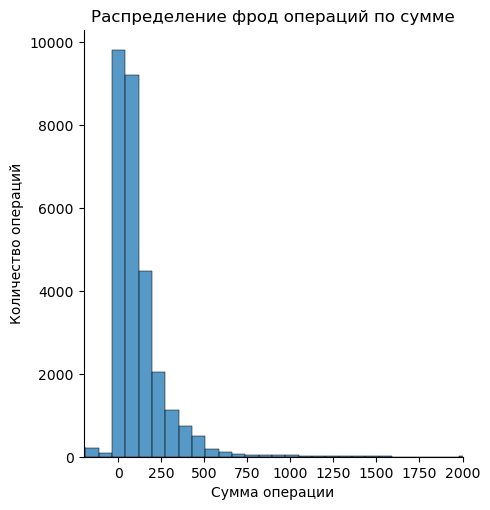

In [4]:
# drawing the plot
sns.displot(fraud_data['Amount'].astype(float), kde=False, bins=80)
plt.title('Распределение фрод операций по сумме')
plt.xlabel('Сумма операции')
plt.ylabel('Количество операций')
plt.xlim(-200, 2000)
plt.show()

## Geography

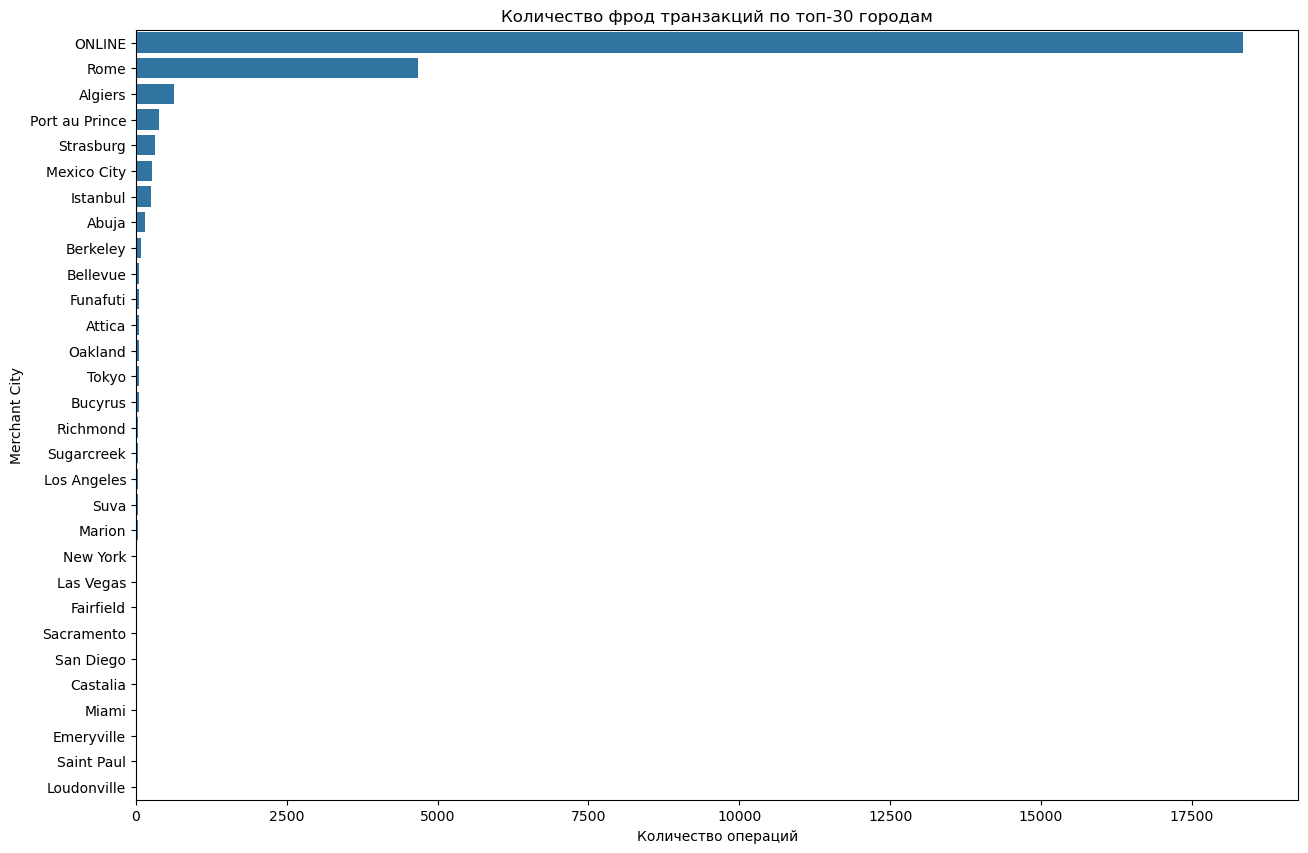

In [6]:
plt.figure(figsize=(15, 10))
top_cities = fraud_data['Merchant City'].value_counts().head(30).index
sns.countplot(data=fraud_data, y='Merchant City', order=top_cities)
plt.xlabel('Количество операций')
plt.title('Количество фрод транзакций по топ-30 городам')
plt.show()

## Time

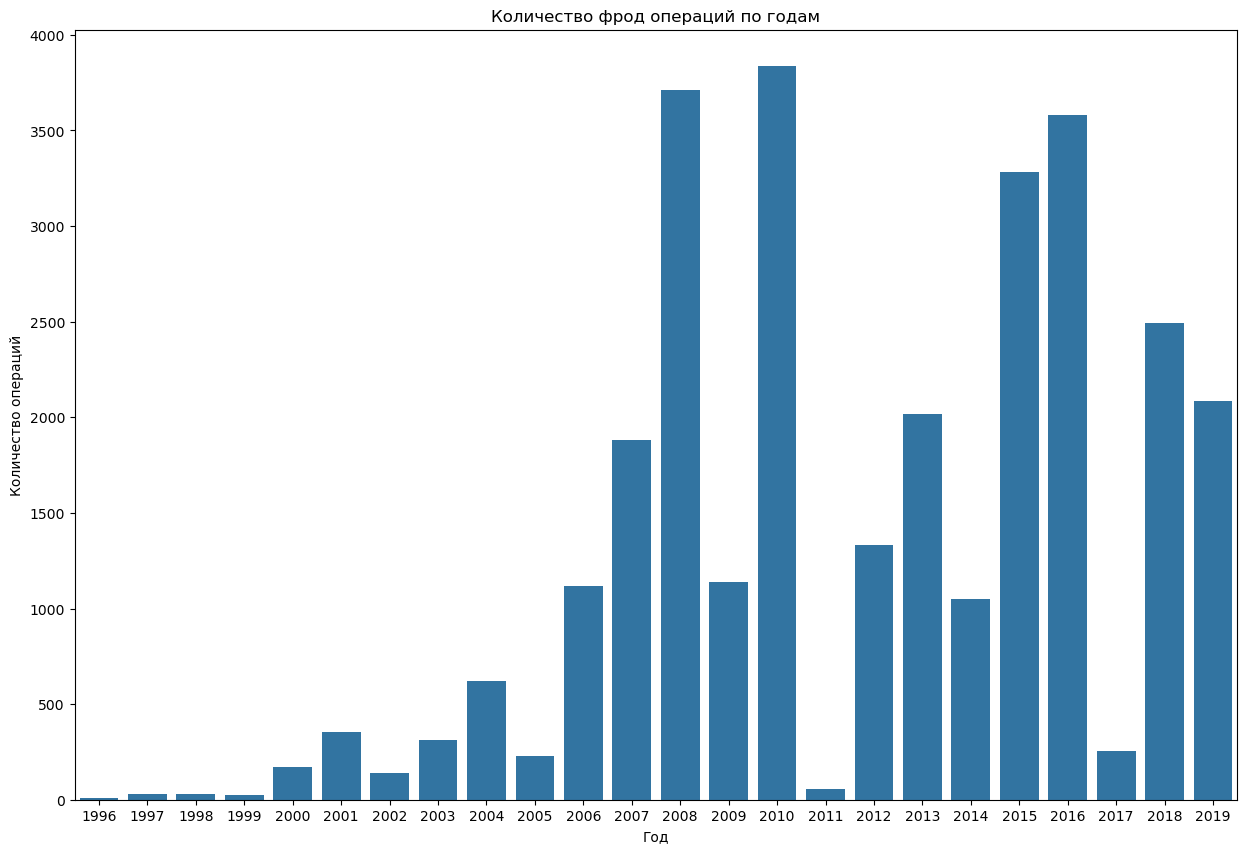

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(data=fraud_data, x='Year')
plt.title('Количество фрод операций по годам')
plt.xlabel('Год')
plt.ylabel('Количество операций')
plt.show()

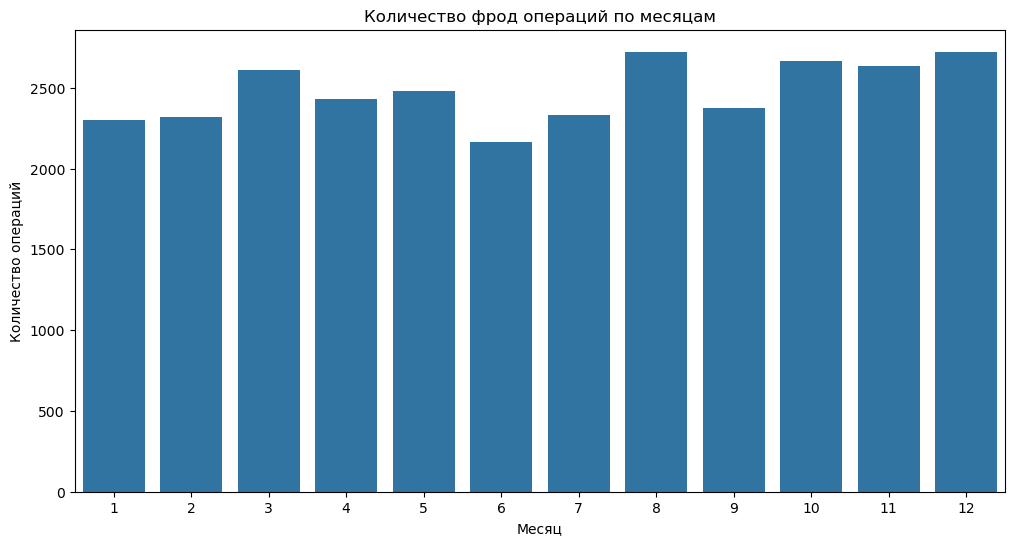

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_data, x='Month')
plt.title('Количество фрод операций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество операций')
plt.show()

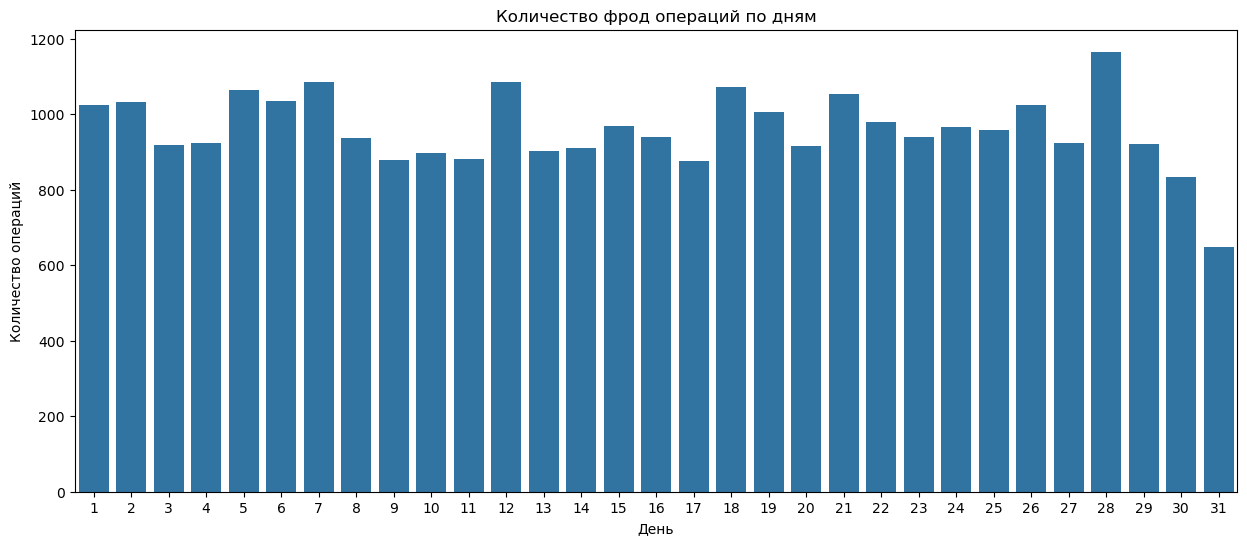

In [9]:
plt.figure(figsize=(15, 6))
sns.countplot(data=fraud_data, x='Day')
plt.title('Количество фрод операций по дням')
plt.xlabel('День')
plt.ylabel('Количество операций')
plt.show()

C:\Users\lakeo\AppData\Local\Temp\ipykernel_10648\3292345068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='Day of Week', order=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], palette="Blues_d")


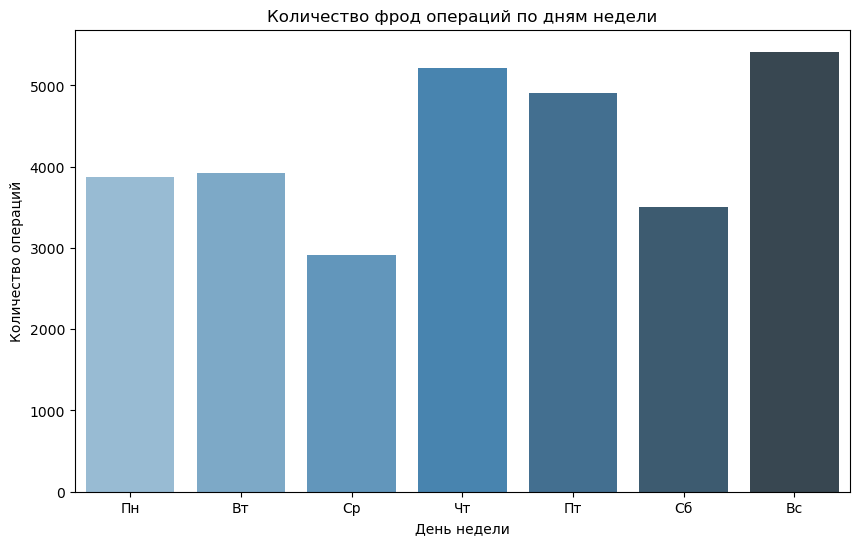

In [10]:
# Visualize
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='Day of Week', order=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], palette="Blues_d")
plt.title('Количество фрод операций по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество операций')
plt.show()

## Transaction Method

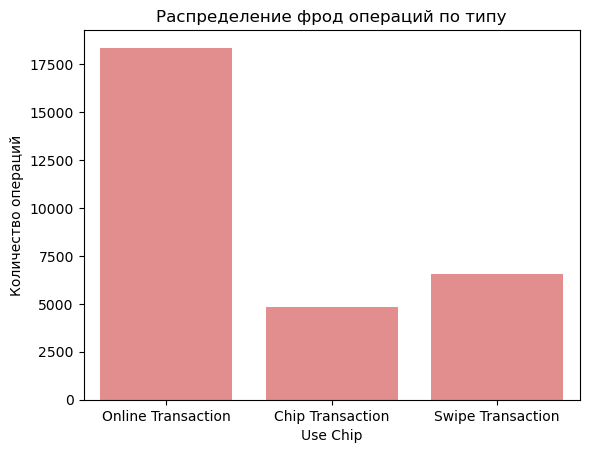

In [11]:
sns.countplot(data=fraud_data, x='Use Chip', color='lightcoral')
plt.title('Распределение фрод операций по типу')
plt.ylabel('Количество операций')
plt.show()

In [24]:
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 2.5})

ValueError: num must be an integer with 1 <= num <= 9, not 10

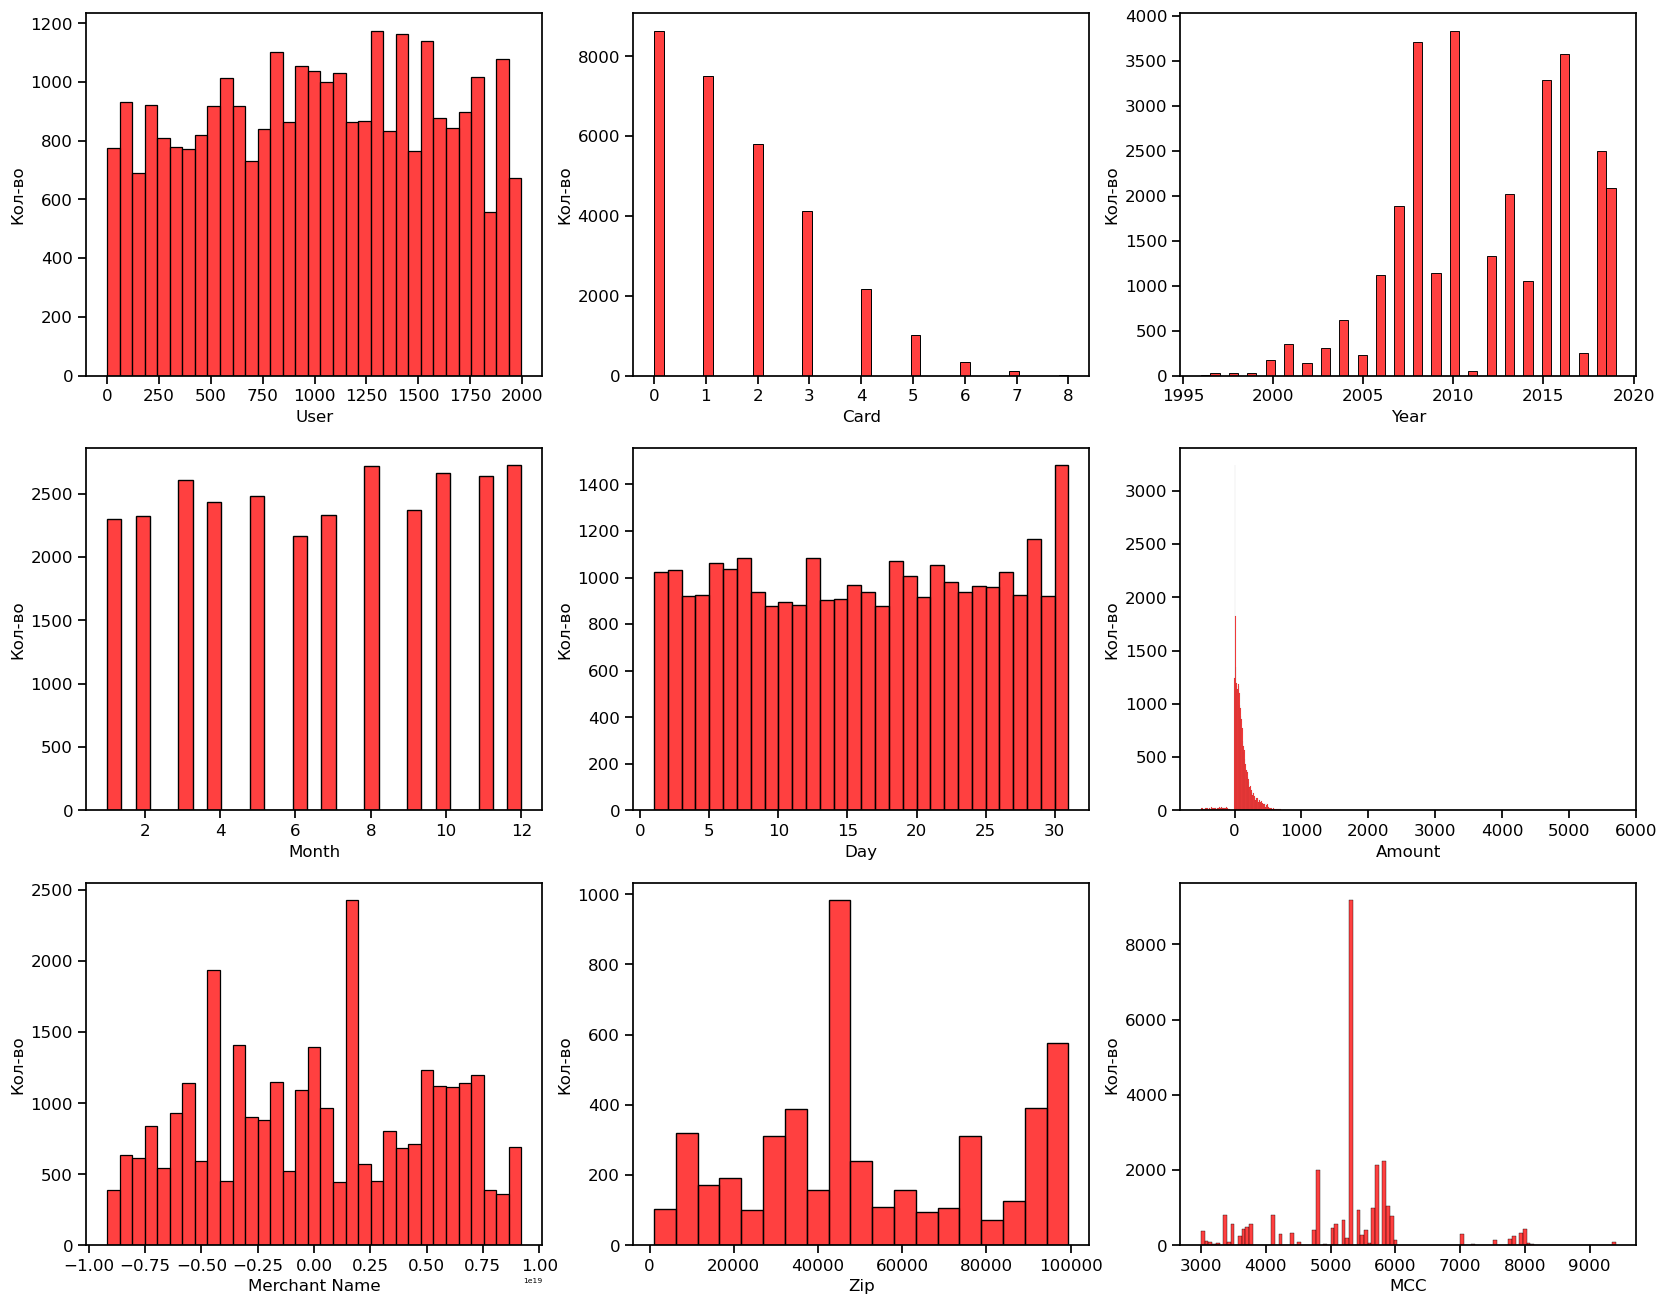

In [26]:
plt.figure(figsize=(20, 16))
for i,col in enumerate(fraud_data.drop(['Is Fraud?'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)  
    sns.histplot(data=fraud_data, x=col, ax=ax, color='red', kde=False)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Кол-во', fontsize=12)
    
plt.suptitle('Распределение атрибутов для фрод-операций',fontsize=18)

plt.tight_layout()

ValueError: num must be an integer with 1 <= num <= 9, not 10

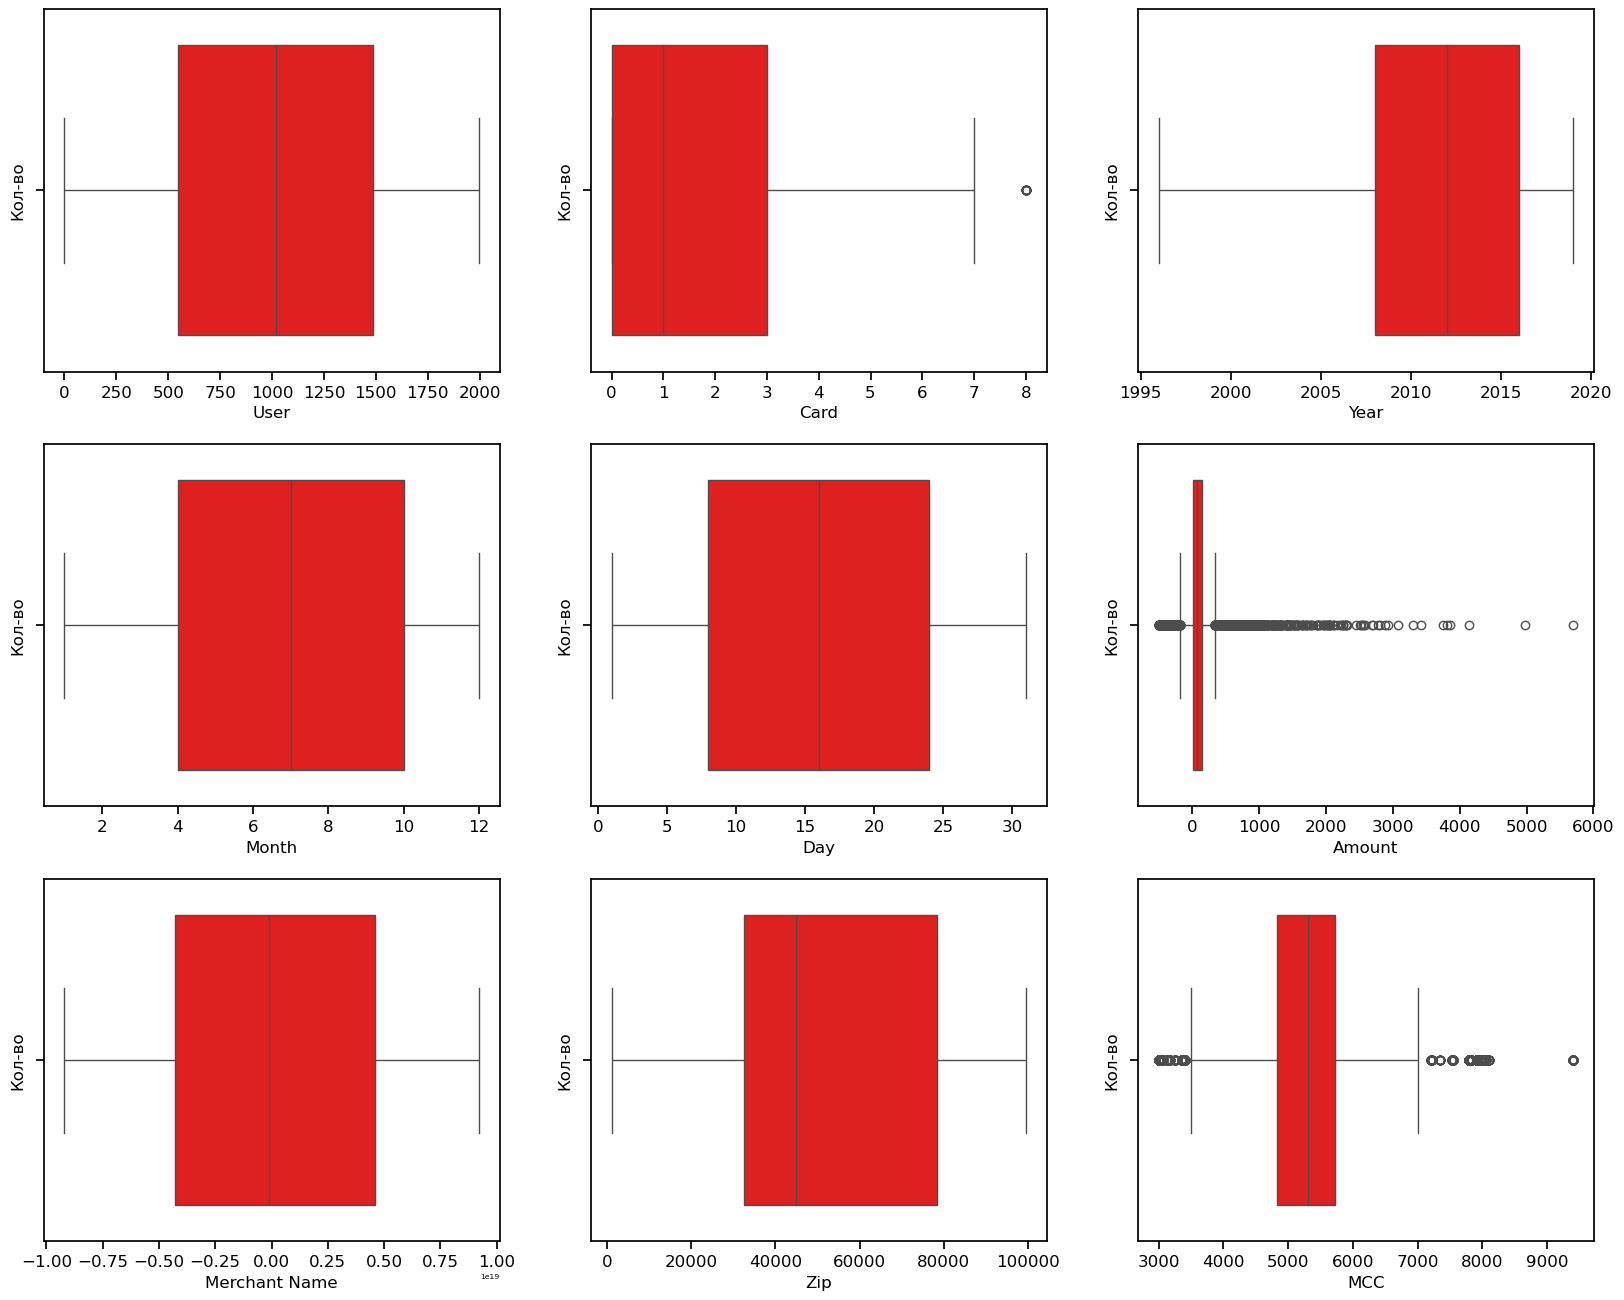

In [30]:
plt.figure(figsize=(20, 16))
for i,col in enumerate(fraud_data.drop(['Is Fraud?'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)  # Creamos una gráfica para cada columna.
    sns.boxplot(data=fraud_data, x=col, ax=ax, color='red')
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Кол-во', fontsize=12)
    
plt.suptitle('Distribución de las variables númericas',fontsize=16)
plt.tight_layout()

C:\Users\lakeo\.conda\envs\mldf_fraud_env\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:69: RuntimeWarning: overflow encountered in scalar subtract
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2
C:\Users\lakeo\.conda\envs\mldf_fraud_env\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\lakeo\.conda\envs\mldf_fraud_env\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\lakeo\.conda\envs\mldf_fraud_env\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


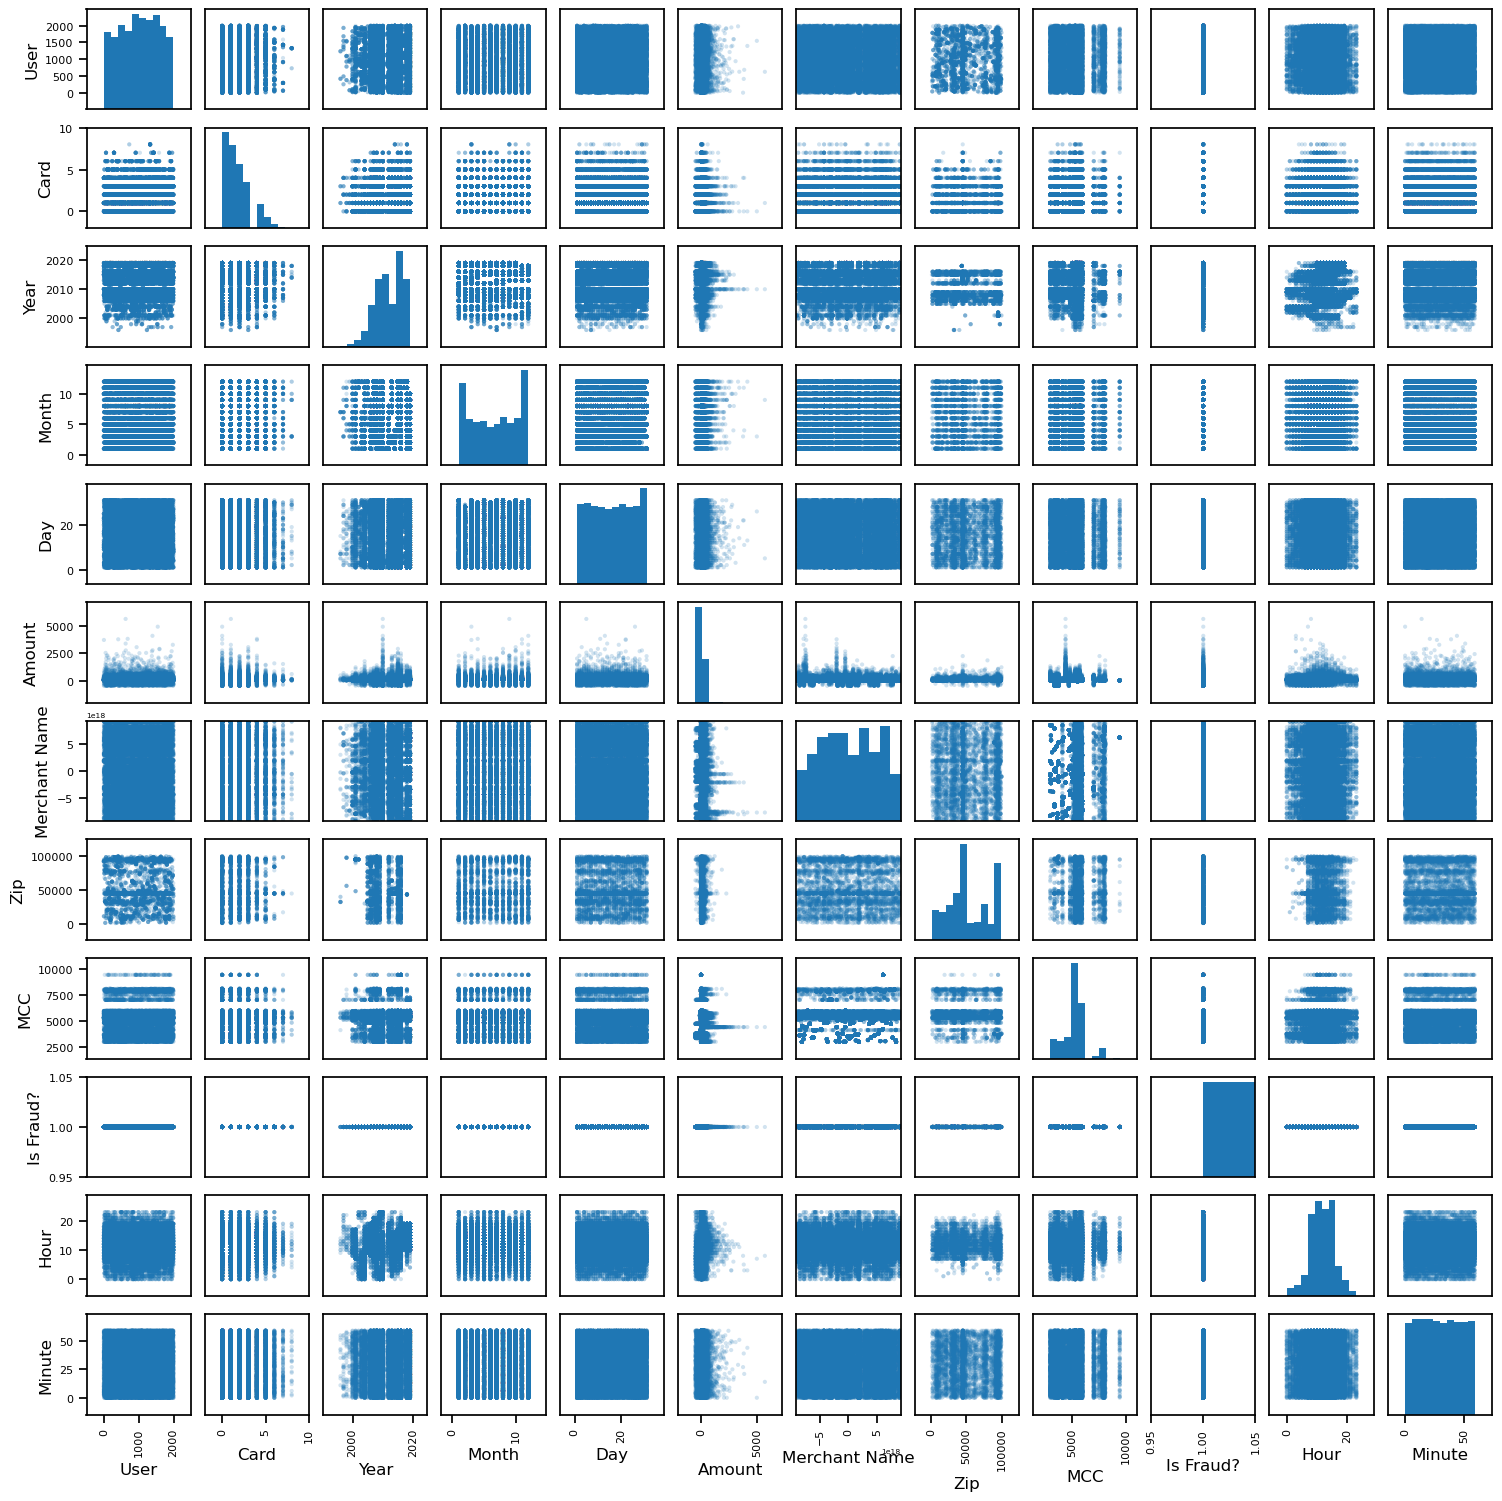

In [31]:
num_columns = fraud_data.select_dtypes(include=['int64', 'float64'])
scatter_matrix = pd.plotting.scatter_matrix(num_columns, alpha=0.2,
                                            grid=False,diagonal='hist', marker='.',range_padding=0.5, figsize=(15, 15))

# Adjust axis labels to avoid overlap and change label size
for ax in scatter_matrix.flatten():
    	ax.tick_params(axis='both', labelsize=8)
    	ax.xaxis.label.set_size(12)
    	ax.yaxis.label.set_size(12)

plt.tight_layout()

plt.show()

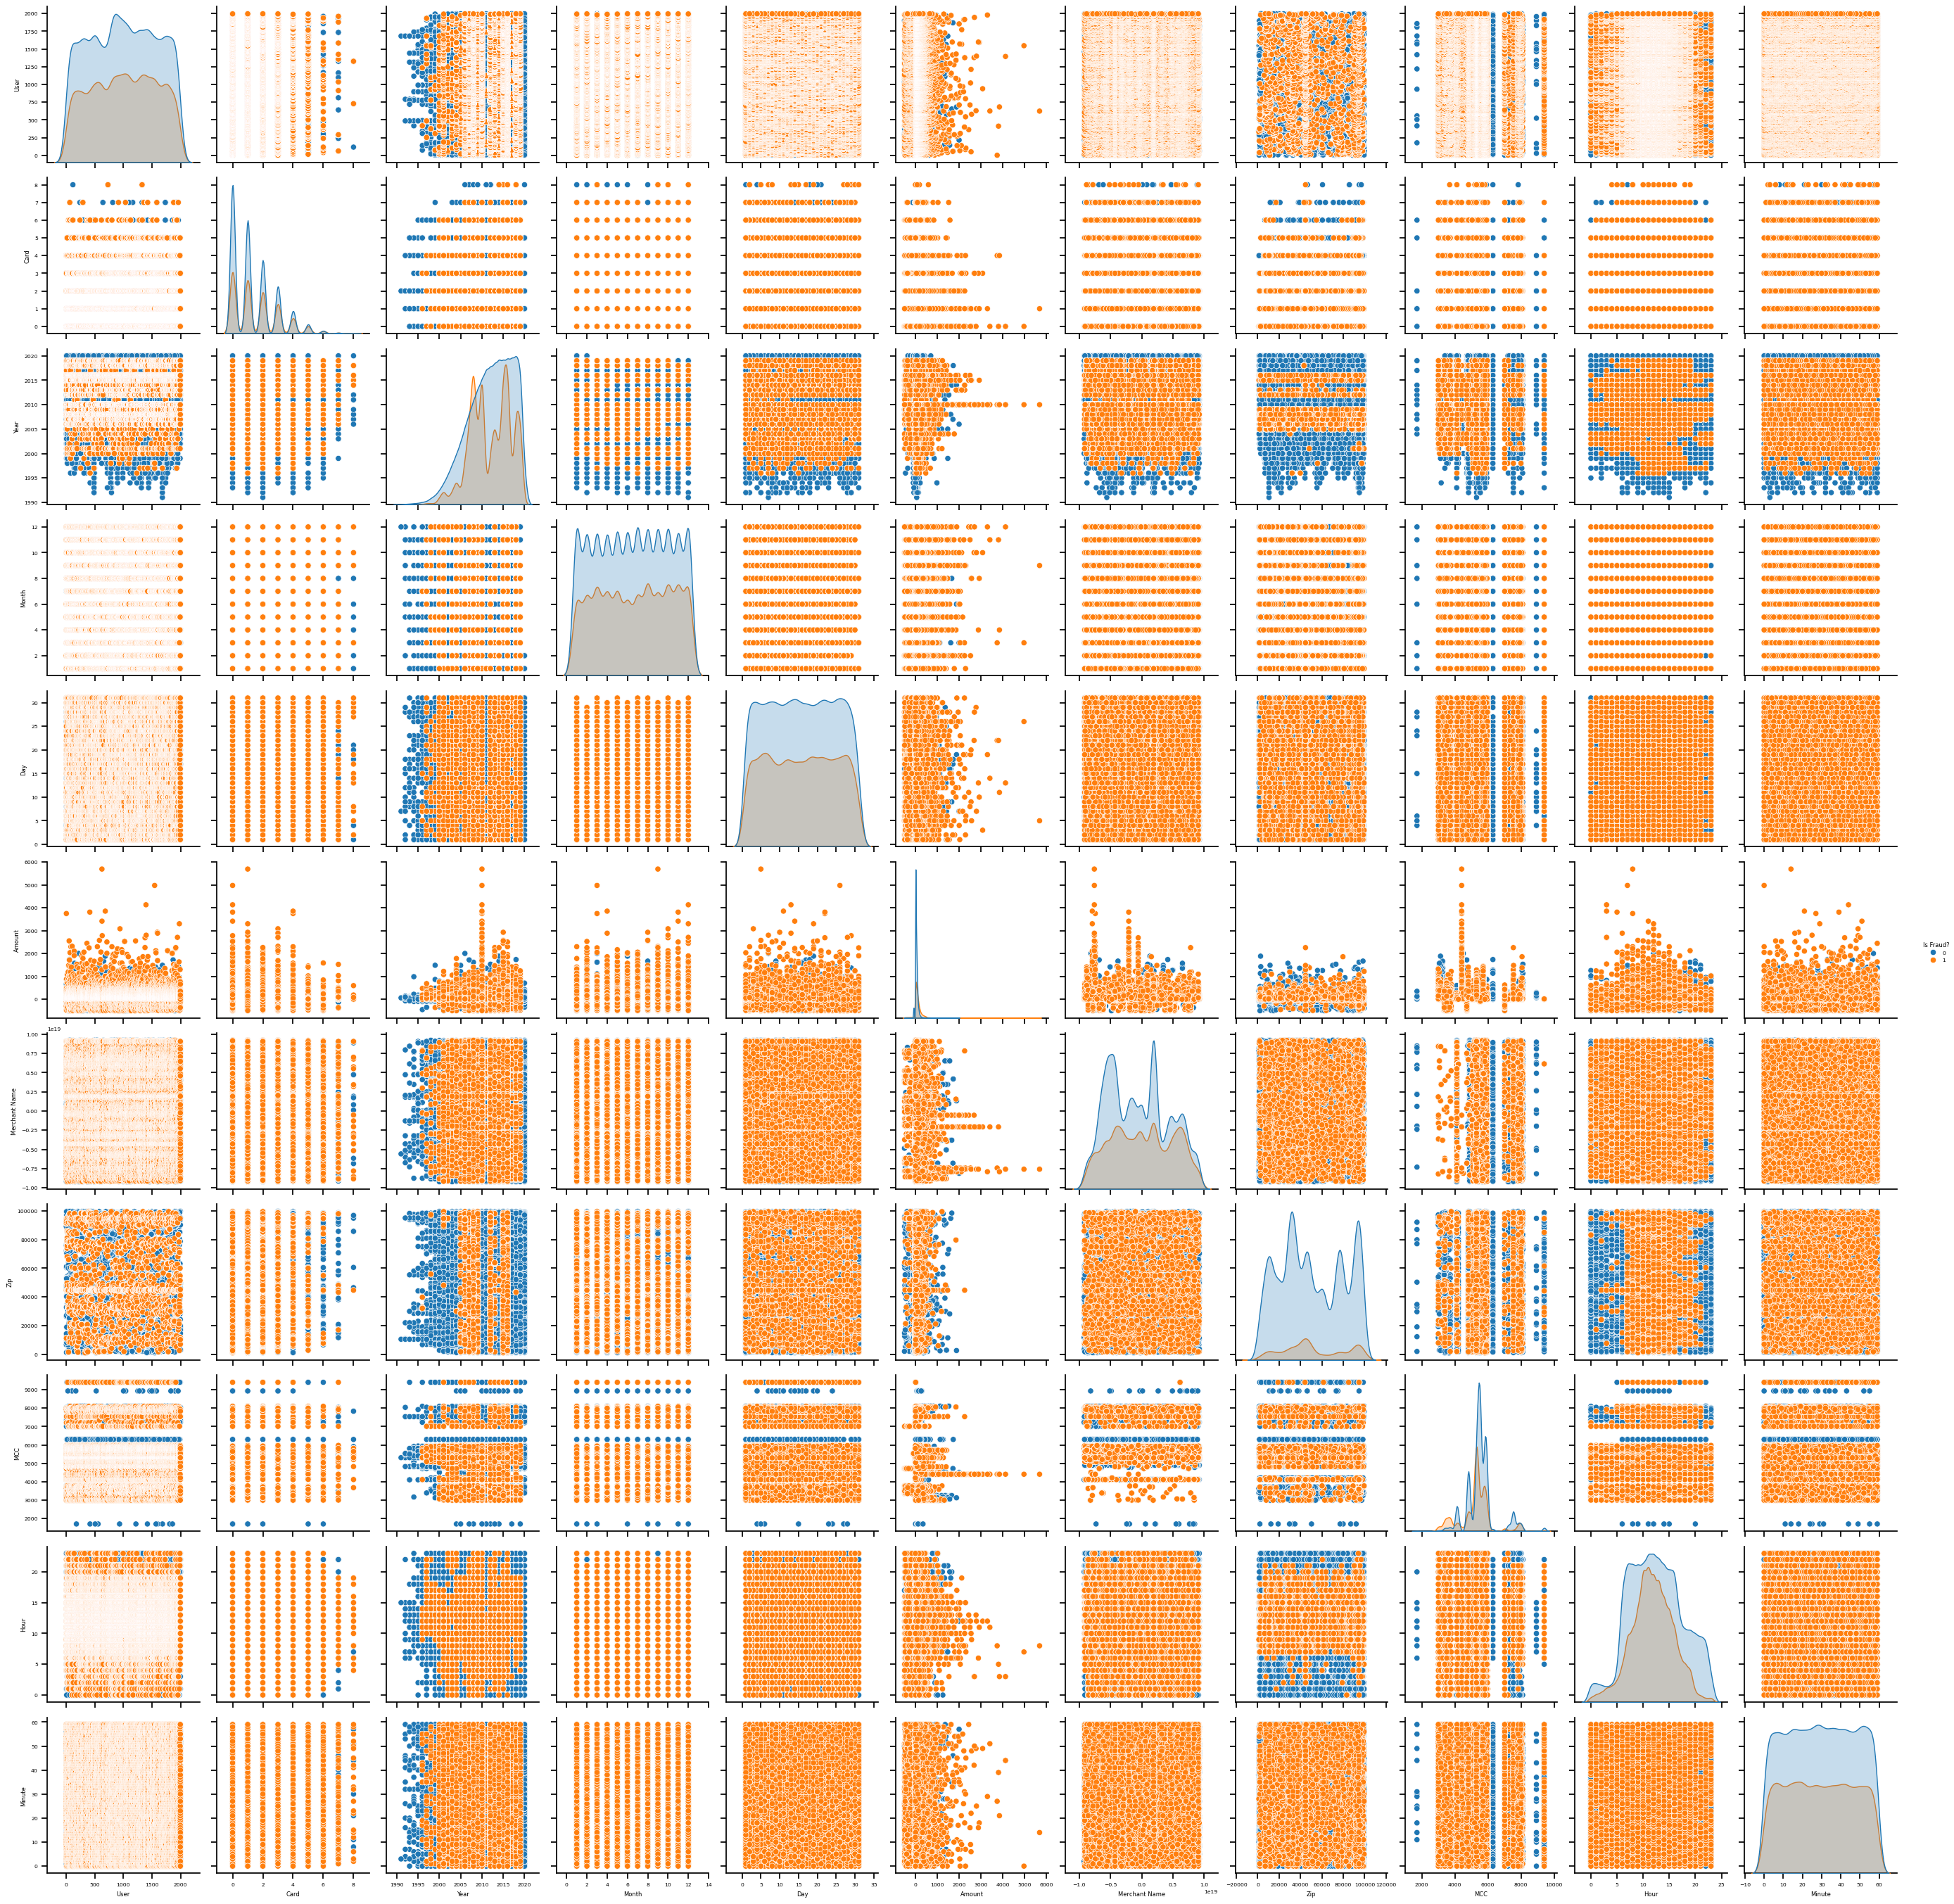

In [32]:
df_attrition_0 = df[df['Is Fraud?'] == 0].sample(frac=0.002, random_state=42)  
df_attrition_1 = df[df['Is Fraud?'] == 1]
df_concatenated = pd.concat([df_attrition_0, df_attrition_1])
sns.pairplot(df_concatenated, hue='Is Fraud?')
plt.show()

<Axes: xlabel='Year'>

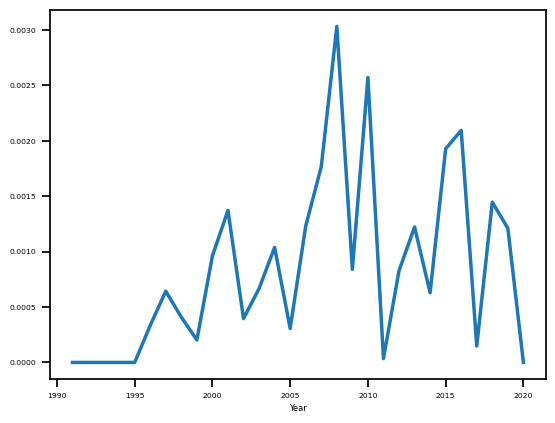

In [36]:
df.groupby('Year')['Is Fraud?'].mean().plot()

In [41]:
df.head(2)

User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   

         Merchant Name  Merchant City Merchant State      Zip   MCC Errors?  \
0  3527213246127876953       La Verne             CA  91750.0  5300     NaN   
1  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   

   Is Fraud?  Hour  Minute            Timestamp        Date Day of Week  
0          0     6      21  2002-09-01 06:21:00  2002-09-01          Вс  
1          0     6      42  2002-09-01 06:42:00  2002-09-01          Вс

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
for i, g in df.groupby('Use Chip'):
    g.plot(x='Date', y='Is Fraud?', ax=ax, label=str(i))

plt.show()

KeyboardInterrupt: 

In [50]:
for i in df.groupby(['Use Chip', 'Year'])['Is Fraud?'].mean()

SyntaxError: expected ':' (121661860.py, line 1)

In [55]:
chips = list(df['Use Chip'].unique())

In [79]:
df_2019 = df[df.Year < 2020]

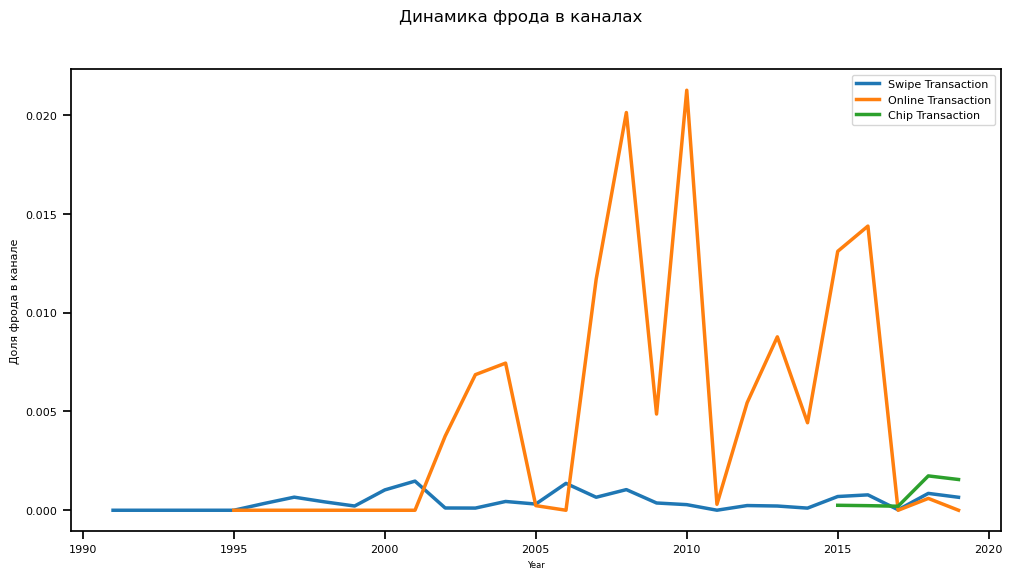

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
for i in chips:
    g = df_2019[df_2019['Use Chip'] == i].groupby('Year')['Is Fraud?'].mean()
    g.plot(x='Year', y='Is Fraud?', ax=ax, label=str(i))
    ax.legend(fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_ylabel('Доля фрода в канале', fontsize=8)
    
    plt.suptitle('Динамика фрода в каналах',fontsize=12)

plt.show()

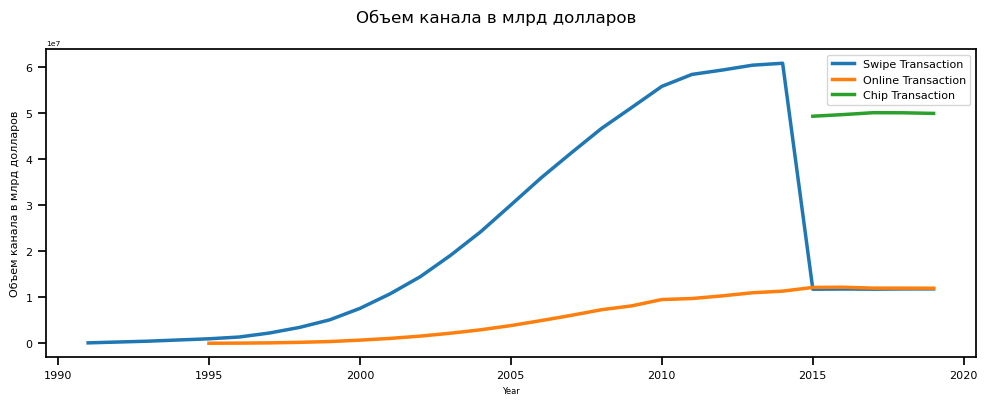

In [89]:
fig, ax = plt.subplots(figsize=(12,4))
for i in chips:
    g = df_2019[(df_2019['Use Chip'] == i)].groupby('Year')['Amount'].sum()
    g.plot(x='Year', y='Amount', ax=ax, label=str(i))
    ax.legend(fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_ylabel('Объем канала в млрд долларов', fontsize=8)
    
    plt.suptitle('Объем канала в млрд долларов',fontsize=12)

plt.show()

In [88]:
df_2019[(df_2019['Use Chip'] == i)].groupby('Year')['Amount'].sum()

Year
2015    49295216.35
2016    49649189.21
2017    50059845.27
2018    50038041.70
2019    49905991.08
Name: Amount, dtype: float64

In [92]:
df[(df.Year >= 2015) & (df.Year <= 2017)].describe()

User          Card          Year         Month           Day  \
count  5.133655e+06  5.133655e+06  5.133655e+06  5.133655e+06  5.133655e+06   
mean   1.006234e+03  1.290352e+00  2.016004e+03  6.534492e+00  1.572567e+01   
std    5.700813e+02  1.370590e+00  8.167591e-01  3.446103e+00  8.796324e+00   
min    0.000000e+00  0.000000e+00  2.015000e+03  1.000000e+00  1.000000e+00   
25%    5.170000e+02  0.000000e+00  2.015000e+03  4.000000e+00  8.000000e+00   
50%    1.011000e+03  1.000000e+00  2.016000e+03  7.000000e+00  1.600000e+01   
75%    1.483000e+03  2.000000e+00  2.017000e+03  1.000000e+01  2.300000e+01   
max    1.999000e+03  8.000000e+00  2.017000e+03  1.200000e+01  3.100000e+01   

             Amount  Merchant Name           Zip           MCC     Is Fraud?  \
count  5.133655e+06   5.133655e+06  4.457627e+06  5.133655e+06  5.133655e+06   
mean   4.296813e+01  -4.809246e+17  5.102985e+04  5.558804e+03  1.385952e-03   
std    8.112104e+01   4.766753e+18  2.939080e+04  8.807619e+02  3.720257e-02   
min   -5.000000e+02  -9.222899e+18  1.001000e+03  1.711000e+03  0.000000e+00   
25%    9.060000e+00  -4.530601e+18  2.831200e+04  5.300000e+03  0.000000e+00   
50%    2.925000e+01  -7.948098e+17  4.733800e+04  5.499000e+03  0.000000e+00   
75%    6.307000e+01   3.189517e+18  7.754500e+04  5.812000e+03  0.000000e+00   
max    5.155360e+03   9.222877e+18  9.992800e+04  9.402000e+03  1.000000e+00   

               Hour        Minute  
count  5.133655e+06  5.133655e+06  
mean   1.238641e+01  2.959286e+01  
std    5.075254e+00  1.731781e+01  
min    0.000000e+00  0.000000e+00  
25%    9.000000e+00  1.500000e+01  
50%    1.200000e+01  3.000000e+01  
75%    1.600000e+01  4.500000e+01  
max    2.300000e+01  5.900000e+01

In [93]:
df[(df.Year >= 2015) & (df.Year <= 2017)].shape

(5133655, 19)

In [94]:
df[(df.Year >= 2015) & (df.Year <= 2017) ]['Is Fraud?'].sum()

7115

In [95]:
df[(df.Year >= 2015) & (df.Year <= 2017) ]['Is Fraud?'].mean()

0.0013859521140396072

In [96]:
df[(df.Year == 2018)].shape

(1721615, 19)

In [97]:
df[(df.Year == 2018)]['Is Fraud?'].mean()

0.0014468972447382255

In [98]:
df[(df.Year == 2018)]['Is Fraud?'].sum()

2491

In [99]:
df[(df.Year == 2019)].shape

(1723938, 19)

In [101]:
df[(df.Year == 2019)]['Is Fraud?'].mean()

0.0012106003812202063